In [1]:
import numpy as np 
import pandas as pd 

import os
print(os.listdir("."))

['.ipynb_checkpoints', 'Datasets_dev_NLI_B.tsv', 'Model Evaluation.ipynb', 'Results_Epoch_1_test_results.tsv', 'Results_Epoch_2_test_results.tsv', 'Results_Epoch_3_test_results.tsv']


In [3]:
test_orig = pd.read_csv('Datasets_dev_NLI_B.tsv', sep='\t')
test_orig.head()

,id,sentence1,polarity,context,target,aspect,label
0,1262,Tienda de Autoservicio. Siempre bien,Positive,Tienda de Autoservicio,general,general,1
1,1262,Tienda de Autoservicio. Siempre bien.,Positive,Tienda de Autoservicio,general,general,1
2,1262,Tienda de Autoservicio. Siempre bien,None,Tienda de Autoservicio,general,general,0
3,1262,Tienda de Autoservicio. Siempre bien.,None,Tienda de Autoservicio,general,general,0
4,1262,Tienda de Autoservicio. Siempre bien,Negative,Tienda de Autoservicio,general,general,0


In [19]:
from glob import glob

test_models = [pd.read_csv(f, sep='\t', header=None, usecols=[0, 1]) for f in glob('Results_Epoch_*.tsv')]
for i, t in enumerate(test_models):
    t['label_pred_{0}'.format(i)] = np.select( [(t[0] >= t[1]), (t[0] < t[1])], [0, 1] )
    del t[0], t[1]

test_model = pd.concat(test_models, axis = 1)
test_model.head()

,label_pred_0,label_pred_1,label_pred_2
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,0


In [29]:
test = pd.concat([test_model, test_orig], axis = 1)
test.head()

,label_pred_0,label_pred_1,label_pred_2,id,sentence1,polarity,context,target,aspect,label
0,1,0,0,1262,Tienda de Autoservicio. Siempre bien,Positive,Tienda de Autoservicio,general,general,1
1,1,0,0,1262,Tienda de Autoservicio. Siempre bien.,Positive,Tienda de Autoservicio,general,general,1
2,0,0,1,1262,Tienda de Autoservicio. Siempre bien,None,Tienda de Autoservicio,general,general,0
3,0,0,1,1262,Tienda de Autoservicio. Siempre bien.,None,Tienda de Autoservicio,general,general,0
4,0,0,0,1262,Tienda de Autoservicio. Siempre bien,Negative,Tienda de Autoservicio,general,general,0


In [31]:
test['y_real'] = np.select([(test['aspect'] == 'general') & (test['polarity'] == 'Positive') & (test['label'] == 0), 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'general') & (test['polarity'] == 'None') & (test['label'] == 0), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Positive') & (test['label'] == 0), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'None') & (test['label'] == 0), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Positive') & (test['label'] == 0), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'None') & (test['label'] == 0), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Positive') & (test['label'] == 0), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'None') & (test['label'] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Positive') & (test['label'] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'None') & (test['label'] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Positive') & (test['label'] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'None') & (test['label'] == 0),
                                 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Positive') & (test['label'] == 1), 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'general') & (test['polarity'] == 'None') & (test['label'] == 1), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Positive') & (test['label'] == 1), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'None') & (test['label'] == 1), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Positive') & (test['label'] == 1), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'None') & (test['label'] == 1), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Positive') & (test['label'] == 1), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'None') & (test['label'] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Positive') & (test['label'] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'None') & (test['label'] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Positive') & (test['label'] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'None') & (test['label'] == 1),
                                 ], 
                                        ['GP0', 'GN0', 'G-0', 
                                         'SP0', 'SN0', 'S-0', 
                                         'AP0', 'AN0', 'A-0', 
                                         '$P0', '$N0', '$-0',
                                         'CP0', 'CN0', 'C-0', 
                                         'UP0', 'UN0', 'U-0',
                                        
                                         'GP1', 'GN1', 'G-1', 
                                         'SP1', 'SN1', 'S-1', 
                                         'AP1', 'AN1', 'A-1', 
                                         '$P1', '$N1', '$-1',
                                         'CP1', 'CN1', 'C-1', 
                                         'UP1', 'UN1', 'U-1'])

In [32]:
for k in test.keys():
    if 'label_pred_' in k:
        test['y_' + k] = np.select([(test['aspect'] == 'general') & (test['polarity'] == 'Positive') & (test[k] == 0), 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Negative') & (test[k] == 0),
                                  (test['aspect'] == 'general') & (test['polarity'] == 'None') & (test[k] == 0), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Positive') & (test[k] == 0), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Negative') & (test[k] == 0),
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'None') & (test[k] == 0), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Positive') & (test[k] == 0), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Negative') & (test[k] == 0),
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'None') & (test[k] == 0), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Positive') & (test[k] == 0), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Negative') & (test[k] == 0),
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'None') & (test[k] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Positive') & (test[k] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Negative') & (test[k] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'None') & (test[k] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Positive') & (test[k] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Negative') & (test[k] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'None') & (test[k] == 0),
                                 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Positive') & (test[k] == 1), 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Negative') & (test[k] == 1),
                                  (test['aspect'] == 'general') & (test['polarity'] == 'None') & (test[k] == 1), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Positive') & (test[k] == 1), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Negative') & (test[k] == 1),
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'None') & (test[k] == 1), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Positive') & (test[k] == 1), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Negative') & (test[k] == 1),
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'None') & (test[k] == 1), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Positive') & (test[k] == 1), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Negative') & (test[k] == 1),
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'None') & (test[k] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Positive') & (test[k] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Negative') & (test[k] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'None') & (test[k] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Positive') & (test[k] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Negative') & (test[k] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'None') & (test[k] == 1),
                                 ], 
                                        ['GP0', 'GN0', 'G-0', 
                                         'SP0', 'SN0', 'S-0', 
                                         'AP0', 'AN0', 'A-0', 
                                         '$P0', '$N0', '$-0',
                                         'CP0', 'CN0', 'C-0', 
                                         'UP0', 'UN0', 'U-0',
                                        
                                         'GP1', 'GN1', 'G-1', 
                                         'SP1', 'SN1', 'S-1', 
                                         'AP1', 'AN1', 'A-1', 
                                         '$P1', '$N1', '$-1',
                                         'CP1', 'CN1', 'C-1', 
                                         'UP1', 'UN1', 'U-1'])

In [33]:
test.head(50)

,label_pred_0,label_pred_1,label_pred_2,id,sentence1,polarity,context,target,aspect,label,y_real,y_label_pred_0,y_label_pred_1,y_label_pred_2
0,1,0,0,1262,Tienda de Autoservicio. Siempre bien,Positive,Tienda de Autoservicio,general,general,1,GP1,GP1,GP0,GP0
1,1,0,0,1262,Tienda de Autoservicio. Siempre bien.,Positive,Tienda de Autoservicio,general,general,1,GP1,GP1,GP0,GP0
2,0,0,1,1262,Tienda de Autoservicio. Siempre bien,None,Tienda de Autoservicio,general,general,0,G-0,G-0,G-0,G-1
3,0,0,1,1262,Tienda de Autoservicio. Siempre bien.,None,Tienda de Autoservicio,general,general,0,G-0,G-0,G-0,G-1
4,0,0,0,1262,Tienda de Autoservicio. Siempre bien,Negative,Tienda de Autoservicio,general,general,0,GN0,GN0,GN0,GN0
5,0,0,0,1262,Tienda de Autoservicio. Siempre bien.,Negative,Tienda de Autoservicio,general,general,0,GN0,GN0,GN0,GN0
6,0,0,0,1262,Tienda de Autoservicio. Siempre bien,Positive,Tienda de Autoservicio,general,servicio,0,SP0,SP0,SP0,SP0
7,0,0,0,1262,Tienda de Autoservicio. Siempre bien.,Positive,Tienda de Autoservicio,general,servicio,0,SP0,SP0,SP0,SP0
8,1,1,1,1262,Tienda de Autoservicio. Siempre bien,None,Tienda de Autoservicio,general,servicio,1,S-1,S-1,S-1,S-1
9,1,1,1,1262,Tienda de Autoservicio. Siempre bien.,None,Tienda de Autoservicio,general,servicio,1,S-1,S-1,S-1,S-1


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
from matplotlib.pyplot import figure
import seaborn as sns
sns.set(style='darkgrid')

def plot_confusion_matrix(y_true, y_pred, classes, title="", cmap=plt.cm.Blues, clean=False, figsize=(20, 16), dpi=300, showLabels=True):
    
    cm = confusion_matrix(y_true, y_pred)    
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    if clean:
        # indexes of No's '0'  and  None's '-'
        indexes = [i for i, c in enumerate(classes) if c.endswith('0') or  '-' in c]
        
        cm = np.delete(cm, indexes, axis=0)
        cm = np.delete(cm, indexes, axis=1)
        
        cm_norm = np.delete(cm_norm, indexes, axis=0)
        cm_norm = np.delete(cm_norm, indexes, axis=1)
        
        classes = np.delete(classes, indexes, axis=0)
        
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    
    im = ax.imshow(cm_norm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, 
           yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label',
           title="Precisión promedio = {0:.2f} %".format(np.mean(cm.diagonal())) if clean else title)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    fmt_norm = '.2f'
    
    thresh = 50
    
    if showLabels:
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                if cm[i, j] == 0:
                    continue
                ax.text(j, i, '\n' + format(cm[i, j], fmt), fontsize=8,
                        ha="center",  va="top",
                        color="white" if cm_norm[i, j] > thresh else "black")

                if not math.isnan(cm_norm[i, j]):
                    ax.text(j, i, format(cm_norm[i, j], fmt_norm) + '%', fontsize=8,
                            ha="center",  va="bottom",
                            color="white" if cm_norm[i, j] > thresh else "black")
        
    
    fig.tight_layout()
    return ax

In [38]:
y_real = test['y_real'].values
y_preds = {}

for k in test.keys():
    if 'y_label_pred_' in k:
        y_preds[k] = test[k].values

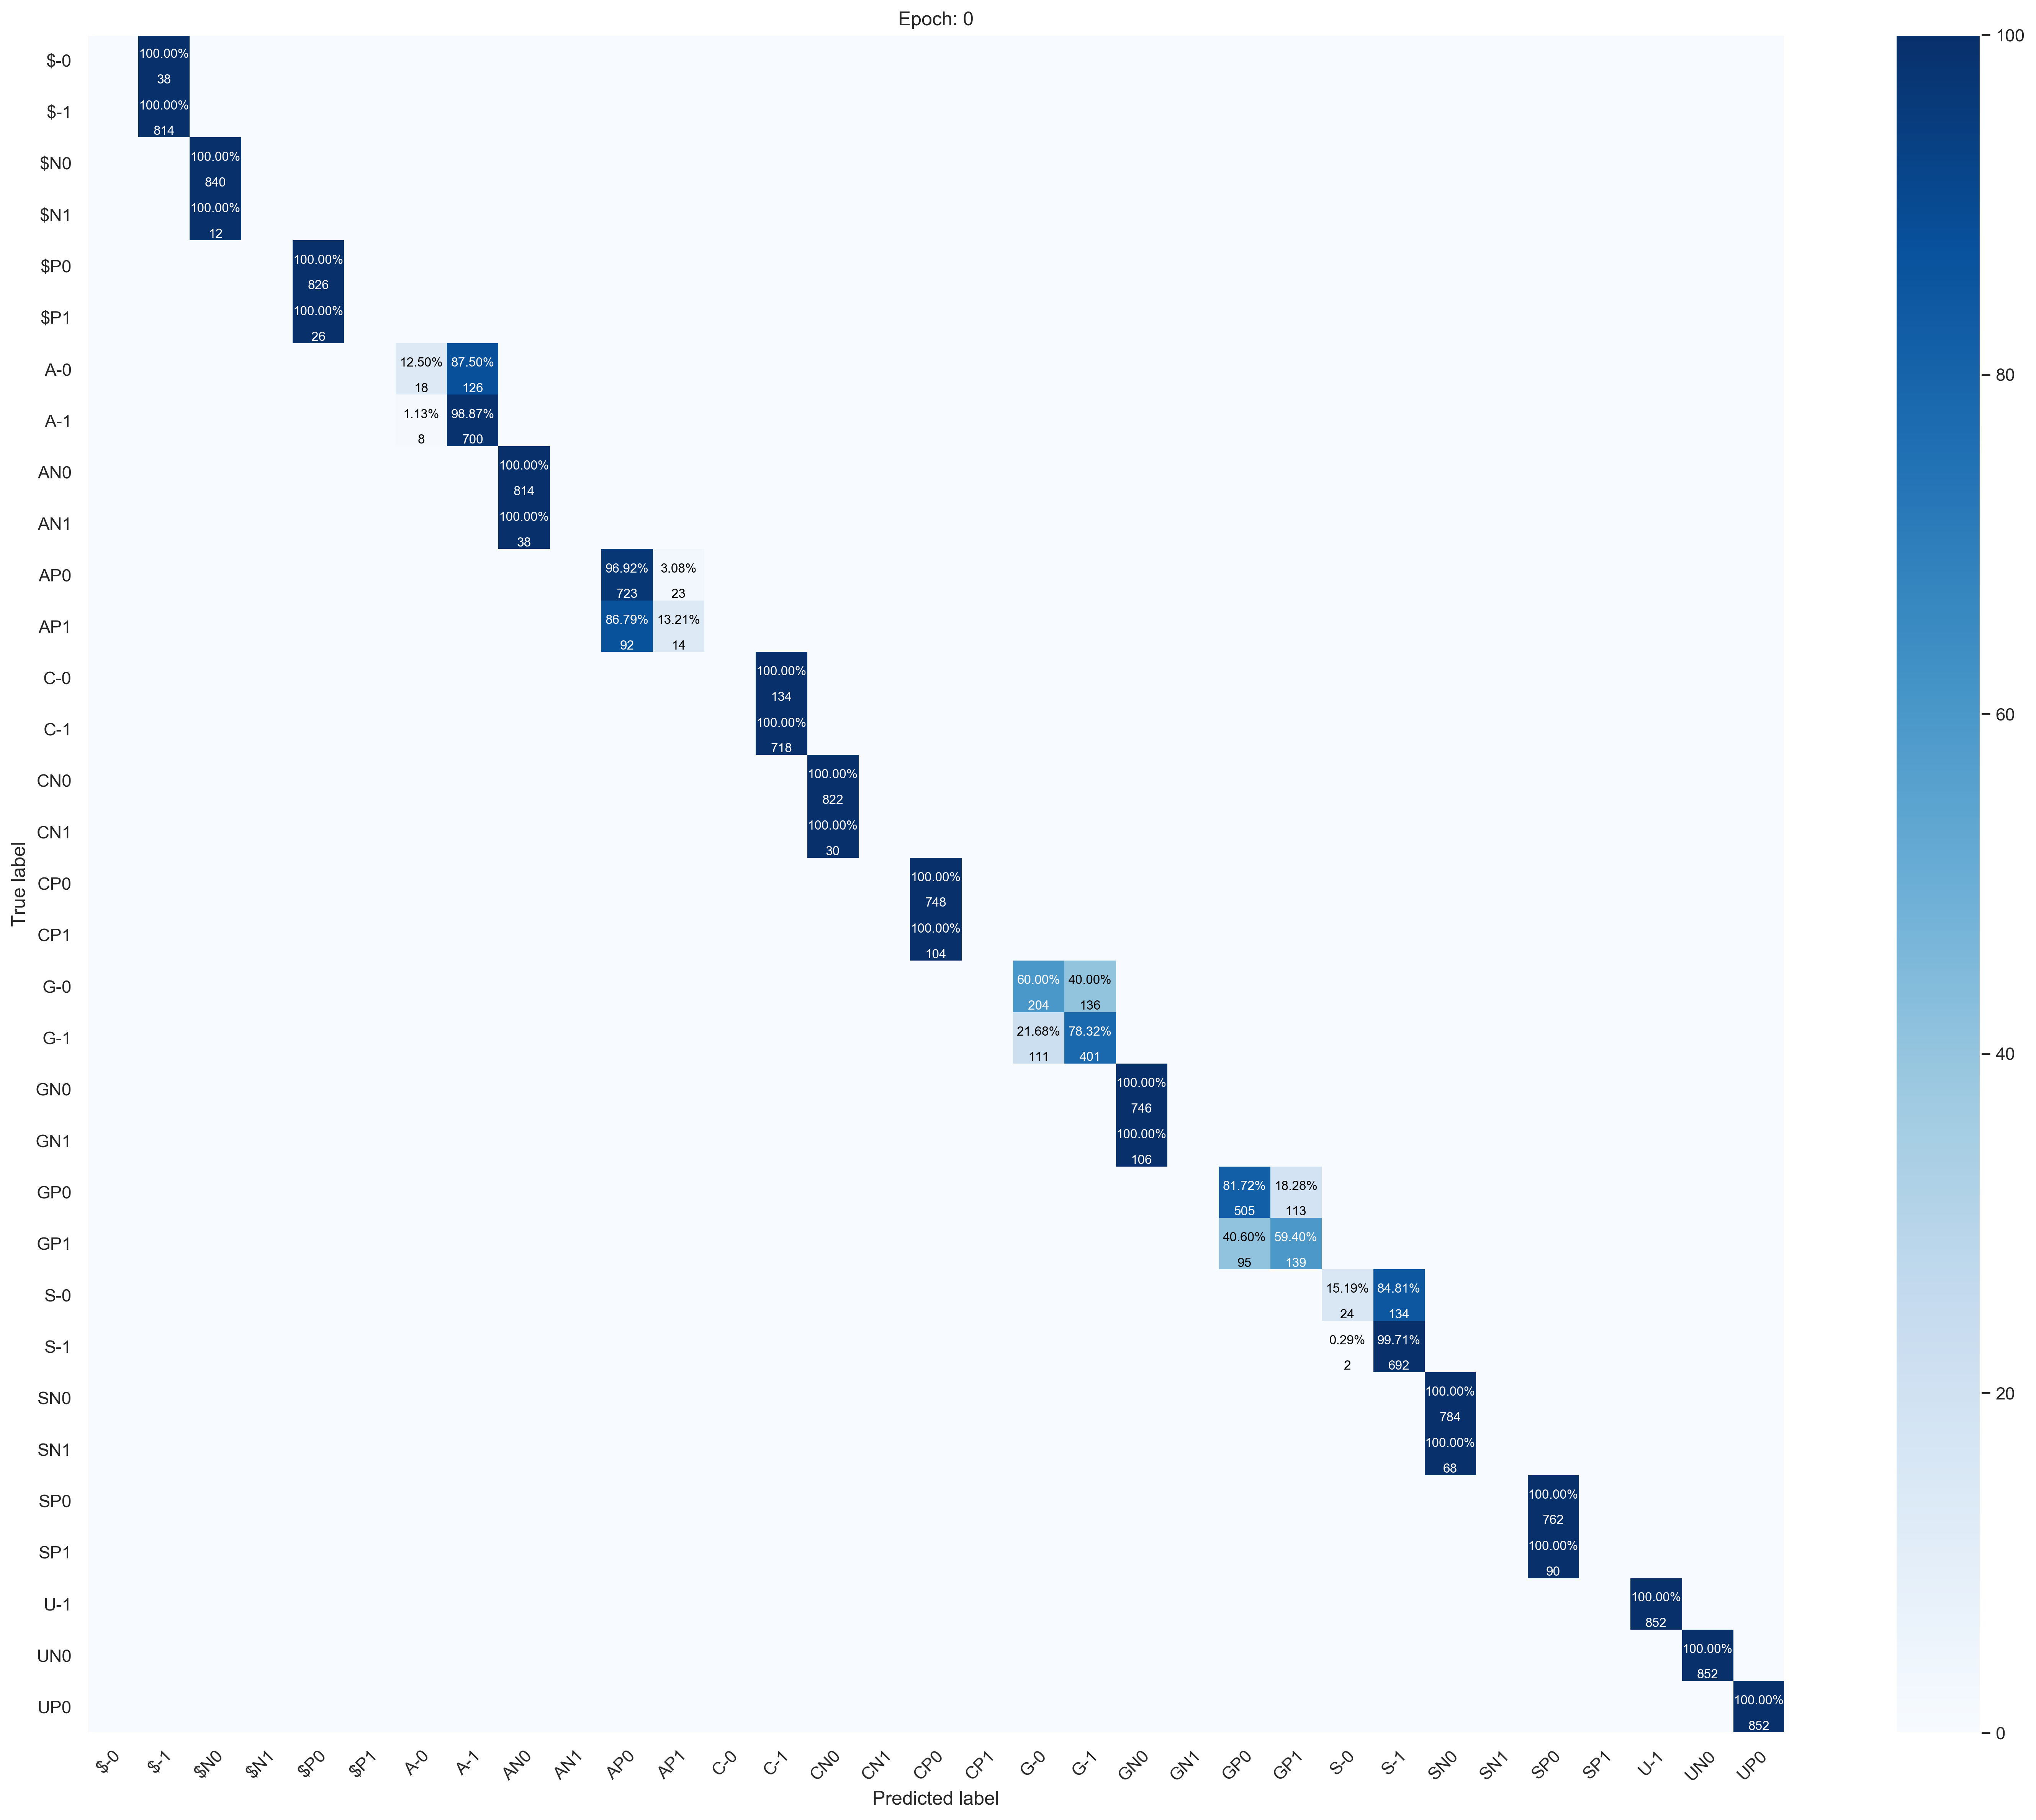

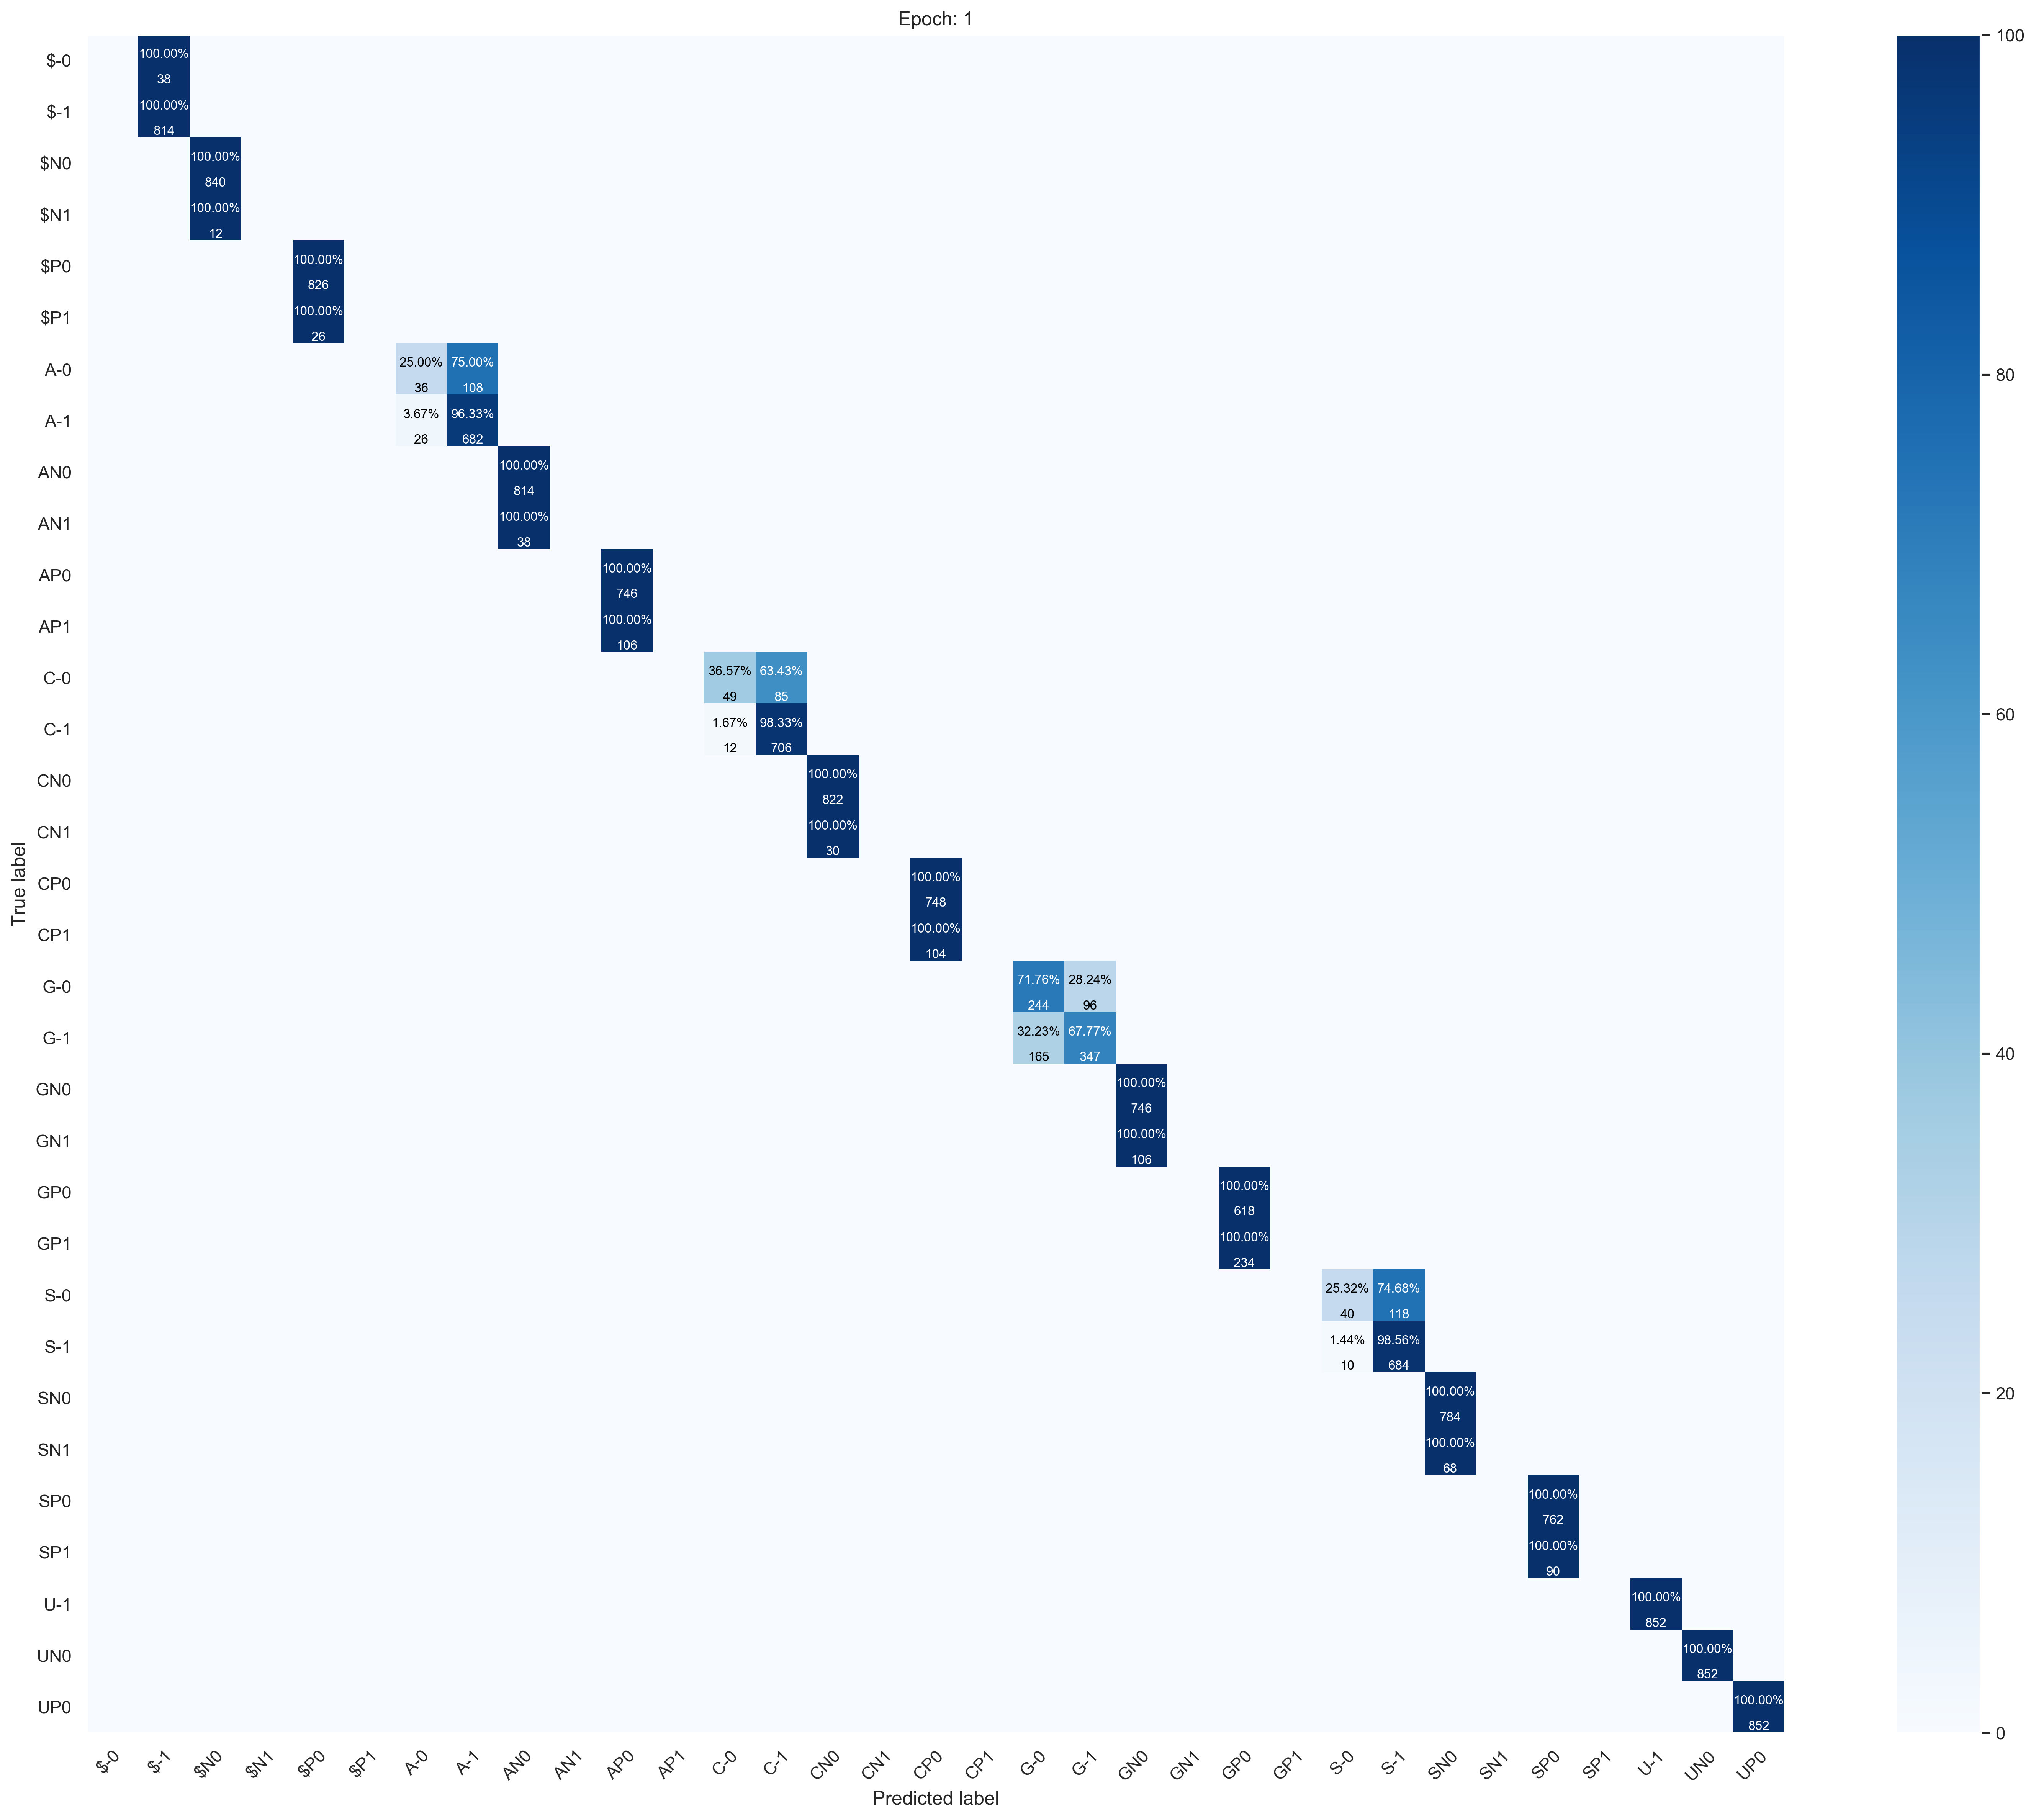

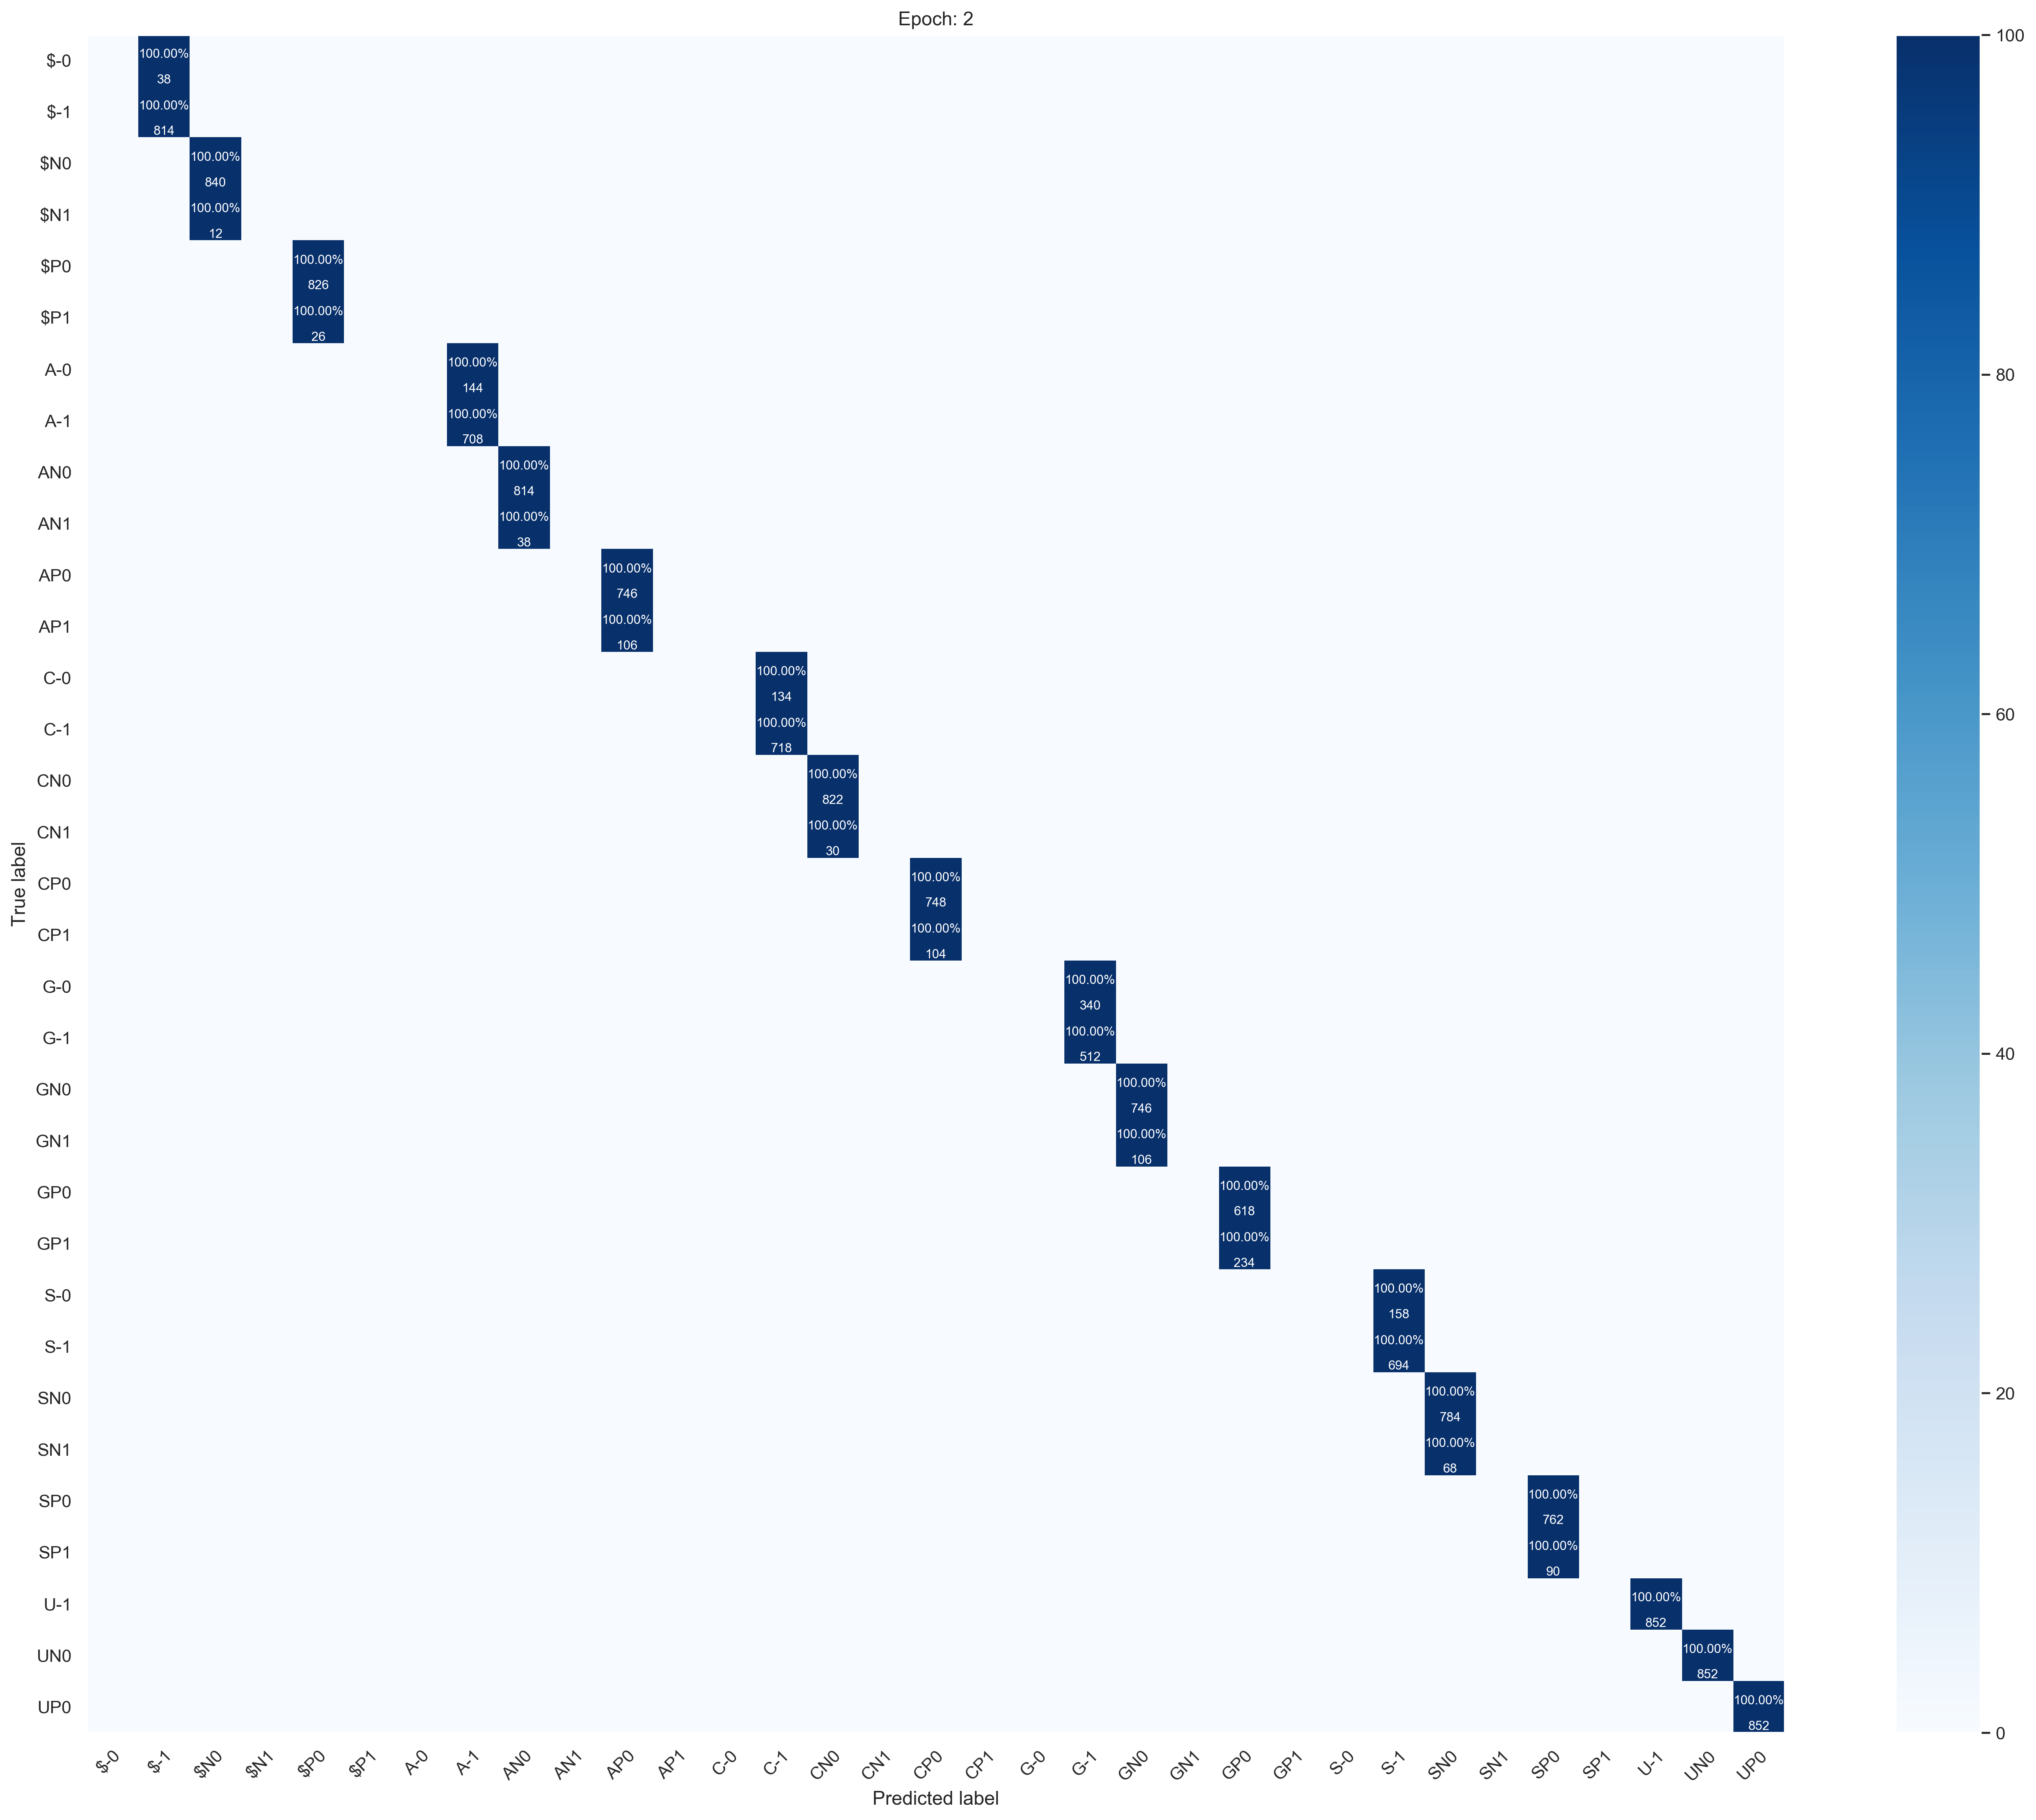

In [47]:
for k in test.keys():
    if 'y_label_pred_' in k:
        y_pred = y_preds[k]
        k = k.replace('y_label_pred_', '')
        plot_confusion_matrix(y_real, y_pred, classes=unique_labels(y_real), title="Epoch: {0}".format(k))

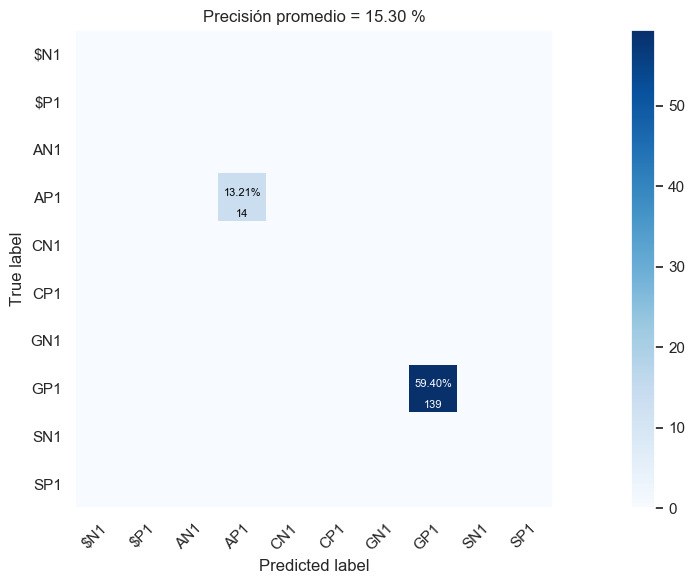

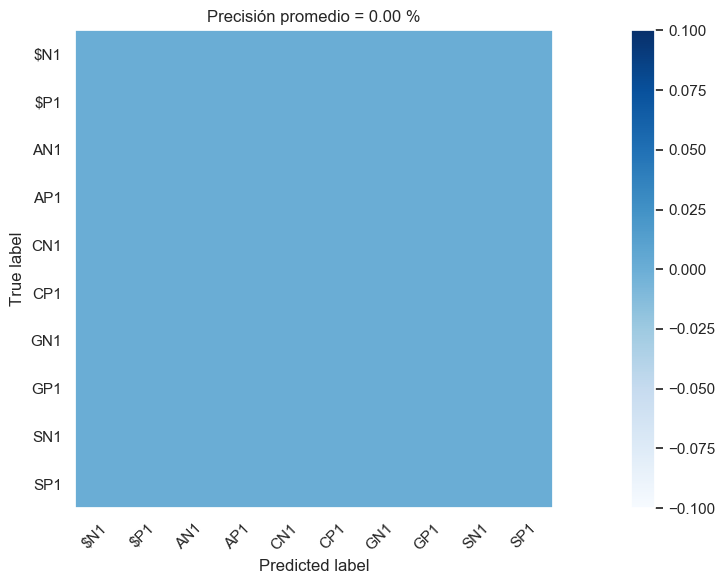

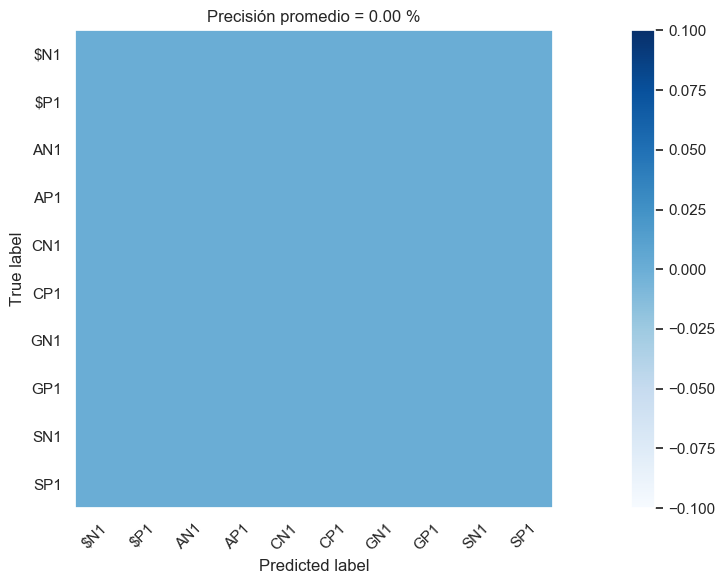

In [46]:
for k in test.keys():
    if 'y_label_pred_' in k:
        y_pred = y_preds[k]
        k = k.replace('y_label_pred_', '')
        plot_confusion_matrix(y_real, y_pred, classes=unique_labels(y_real), clean=True, figsize=(16, 6), dpi=100)